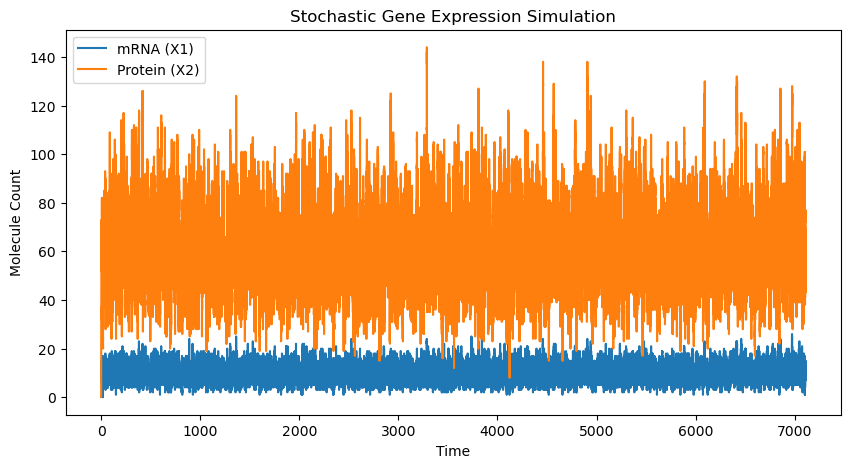

Experimental CV (mRNA): 0.302, Theoretical CV: 0.316
Experimental CV (Protein): 0.252, Theoretical CV: 0.258


In [115]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 19 17:20:05 2022
%file stochastic_gene_expression.m
%stochastic implementation (Gillespie SSA) of a constitutive gene
%expression
%Figure 7.46

@author: bingalls
"""
import numpy as np
import matplotlib.pyplot as plt
import random


def gillespie_gene_expression(kr, gr, kp, gp, Tend, X1_0=10, X2_0=0):
    #set initial condition for molecule counts (M, P) and 
    #for simulation time

    X=np.zeros((Tend,3))
    X[0,1]=X1_0
    X[0,2]=X2_0

    for j in range(Tend-1):

        #calculate propensities
        a1=kr
        a2=kp*X[j,1]
        a3=gr*X[j,1]
        a4=gp*X[j,2]

        asum=a1+a2+a3+a4

        #update time
        X[j+1,0]=X[j,0]+np.log(1/random.uniform(0,1))/asum

        #state transition
        mu=random.uniform(0,1)
        if 0 <= mu and mu < a1/asum:
            X[j+1,1]=X[j,1]+1
            X[j+1,2]=X[j,2]
        elif a1/asum <= mu and mu  < (a1+a2)/asum:
            X[j+1,1]=X[j,1]
            X[j+1,2]=X[j,2]+1
        elif (a1+a2)/asum <= mu and mu < (a1+a2+a3)/asum:
            X[j+1,1]=max(X[j,1]-1,0)
            X[j+1,2]=X[j,2]
        else:
            X[j+1,1]=X[j,1]
            X[j+1,2]=max(X[j,2]-1,0)
    return X
    

#set kinetic parameter values
kr=10;
kp=6;
gr=1;
gp=1;




#set number of reactions
Tend=1000000

# Run the simulation
simulation_data = gillespie_gene_expression(kr, gr, kp, gp, Tend)



# Plot results
plt.figure(figsize=(10, 5))
plt.plot(simulation_data[:, 0], simulation_data[:, 1], label='mRNA (X1)')
plt.plot(simulation_data[:, 0], simulation_data[:, 2], label='Protein (X2)')
plt.xlabel('Time')
plt.ylabel('Molecule Count')
plt.legend()
plt.title('Stochastic Gene Expression Simulation')
plt.show()


# Calculate steady-state statistics
X1_ss = simulation_data[:, 1][5000:]  # Consider second half for steady-state
X2_ss = simulation_data[:, 2][5000:]

mean_X1 = np.mean(X1_ss)
std_X1 = np.std(X1_ss)
C_r = np.sqrt(gr / kr)  # Theoretical coefficient of variation
cv_X1 = std_X1 / mean_X1

mean_X2 = np.mean(X2_ss)
std_X2 = np.std(X2_ss)
C_p = np.sqrt((gr * gp) / (kr * kp)) * np.sqrt(1 + kp / (gr + gp))
cv_X2 = std_X2 / mean_X2

print(f"Experimental CV (mRNA): {cv_X1:.3f}, Theoretical CV: {C_r:.3f}")
print(f"Experimental CV (Protein): {cv_X2:.3f}, Theoretical CV: {C_p:.3f}")